In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

#Retrieve the DataFrame that we stored
%store -r pga_data
print(pga_data.info())
df = pga_data.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2971 entries, 0 to 3675
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   player_id      2971 non-null   string        
 1   player         2971 non-null   string        
 2   tournament_id  2971 non-null   string        
 3   tournament     2971 non-null   string        
 4   date           2971 non-null   datetime64[ns]
 5   course         2971 non-null   string        
 6   city           2971 non-null   string        
 7   state          2971 non-null   string        
 8   purse          2971 non-null   float64       
 9   no_cut         2971 non-null   bool          
 10  finish         2971 non-null   string        
 11  position       2971 non-null   float64       
 12  made_cut       2971 non-null   bool          
 13  rounds_played  2971 non-null   int64         
 14  strokes        2971 non-null   int64         
 15  sg_putt        2971 n

1. We can first plot some distributions to see whether our data is normally distributed or not.

Mean SG Putting: -0.122
Median SG: Putting: -0.09
Standard deviation SG: Putting: 1.071


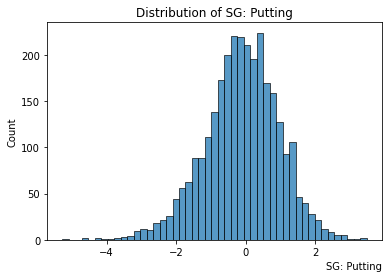

--------------------------------------------------
Mean SG Around the green: -0.035
Median SG: Around the green: 0.01
Standard deviation SG: Around the green: 0.738


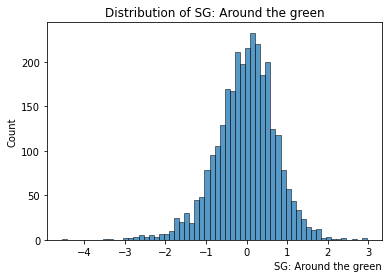

--------------------------------------------------
Mean SG Approach: -0.113
Median SG: Approach: -0.01
Standard deviation SG: Approach: 1.123


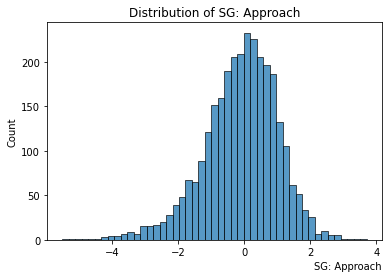

--------------------------------------------------
Mean SG Off the tee: -0.041
Median SG: Off the tee: 0.03
Standard deviation SG: Off the tee: 0.778


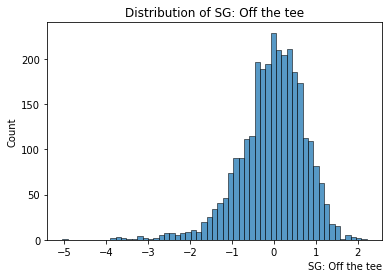

--------------------------------------------------
Mean SG Tee to green: -0.189
Median SG: Tee to green: -0.05
Standard deviation SG: Tee to green: 1.643


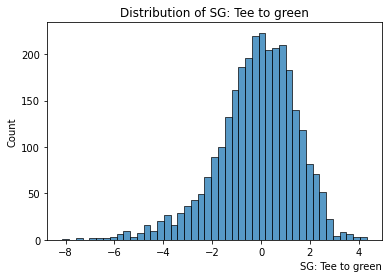

--------------------------------------------------
Mean SG Total: -0.289
Median SG: Total: -0.15
Standard deviation SG: Total: 1.862


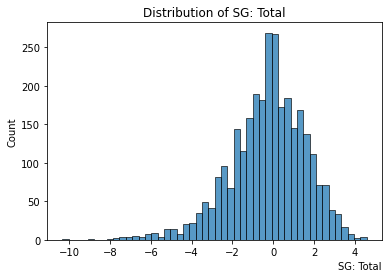

--------------------------------------------------
Mean score per round: 71.1
Median score per round: 71.0
Standard deviation of score per round: 2.4


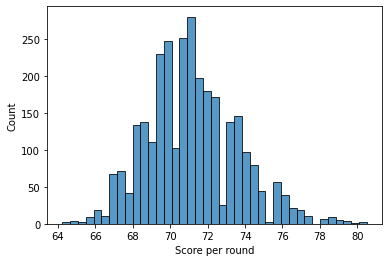

<Figure size 432x288 with 0 Axes>

In [2]:
numeric_vars = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']
vars_words = ['Putting', 'Around the green', 'Approach', 'Off the tee', 'Tee to green', 'Total']

for var, word in zip(numeric_vars, vars_words):
    print('Mean SG {}:'.format(word), np.round(df[var].mean(),3))
    print('Median SG: {}:'.format(word), np.round(df[var].median(),3))
    print('Standard deviation SG: {}:'.format(word), np.round(np.std(df[var]),3))
    sns.histplot(df[var])
    plt.xlabel('SG: {}'.format(word), loc = 'right')
    plt.title('Distribution of SG: {}'.format(word))
    plt.show()
    plt.clf()
    print('-'*50)
    
score_per_round = df.strokes/df.rounds_played
print('Mean score per round:', np.round(np.mean(score_per_round),1))
print('Median score per round:', np.median(score_per_round))
print('Standard deviation of score per round:', np.round(np.std(score_per_round),1))
sns.histplot(df.strokes/df.rounds_played)
plt.xlabel('Score per round')
plt.show()
plt.clf()

2. Lets now look at some random (**but interesting**) statistics from the data we have! Not bound to:
    1. What was the total prize money offered in 2022? (excluding tournaments we've not included)
    2. Who were the top 5 / bottom 5 for best average score per round?
    3. Who had the most first place finishes?
    4. Who were the top 5 / bottom 5 in all strokes gained categories?
    5. Who made the most / least cuts throughout the season?
    6. Who had the best / worst average `position` throughout the season? (players who made the cut AND have played more than 10 events)
    7. What was the easiest / hardest tournament of the year? (for players who played all 4 rounds)

In [3]:
# A
total_prize_money = df.groupby(['tournament','purse']).purse.agg(lambda x: x.sum()/len(x)).sum()
print('Total prize money:','$' + str(np.round(total_prize_money,1)) + 'M')
print('-'*50)

# B
df['avg_score'] = df.strokes/df.rounds_played
avg_score_players = df.groupby('player').avg_score.mean().sort_values(ascending=True)
print('Top 5 for best score per round:\n', avg_score_players[:5])
print('-'*50)
print('Bottom 5 for best score per round:\n', avg_score_players[-5:-10:-1])
print('-'*50)

# C
most_firsts = df.loc[df.position == 1].player.value_counts().sort_values(ascending=False)
print('Most first place finishes:\n', most_firsts[:2])
print('-'*50)

# D
def strokes_gained_best():
    for index, category in enumerate(numeric_vars):
        strokes_gained_best_index = df.groupby('player')[category].mean().sort_values(ascending=False)
        print('Top 5 for strokes gained: {}\n'.format(vars_words[index]),strokes_gained_best_index[:5])
        print('Bottom 5 for strokes gained: {}\n'.format(vars_words[index]),strokes_gained_best_index[-5:])
        print('-'*50)
strokes_gained_five = strokes_gained_best()

# E
cuts_made = df.loc[df.made_cut == True,['player','made_cut']].groupby('player').made_cut.count().sort_values(ascending=False)[:1]
cuts_not_made = df.loc[df.made_cut == False,['player','made_cut']].groupby('player').made_cut.count().sort_values(ascending=False)[:1]
print('Player with most cuts made:\n',cuts_made)
print('Player with least cuts made:\n',cuts_not_made)
print('-'*50)

# F
played10 = df.groupby('player').filter(lambda x: len(x['sg_total']) >= 10)
avg_position = played10.loc[(played10.made_cut == True) & (played10.position != 0)].groupby('player').position.mean().sort_values()
print('Top 5 for average position throughout season:\n', avg_position[:5])
print('Bottom 5 for average position throughout season:\n', avg_position[-5:])
print('-'*50)

# G
tournament_difficulty = df[df.rounds_played == 4].groupby('tournament').avg_score.mean().sort_values()
print('Easiest tournament:\n', tournament_difficulty[:1])
print('Hardest tournament:\n', tournament_difficulty[-1:])

Total prize money: $237.6M
--------------------------------------------------
Top 5 for best score per round:
 player
Justin Thomas        68.770833
Andy Ogletree        68.875000
Cameron Smith        68.954545
Kyle Reifers         69.000000
Scottie Scheffler    69.339286
Name: avg_score, dtype: float64
--------------------------------------------------
Bottom 5 for best score per round:
 player
Ted Potter Jr.    78.0
Derek Ernst       78.0
Larry Mize        77.5
Kevin Stadler     77.0
Fred Couples      77.0
Name: avg_score, dtype: float64
--------------------------------------------------
Most first place finishes:
 Scottie Scheffler    3
Sam Burns            3
Name: player, dtype: Int64
--------------------------------------------------
Top 5 for strokes gained: Putting
 player
Guido Migliozzi    1.825
Tyler Collet       1.610
Larry Mize         1.520
Alvaro Ortiz       1.380
Michael Kim        1.350
Name: sg_putt, dtype: float64
Bottom 5 for strokes gained: Putting
 player
Kevin Sta

3. Now let's look at some more in depth statistics for different players.

The **top 5 for average position** are: Cameron Smith, Sam Burns, Justin Thomas, Will Zalatoris, Xander Schauffele.
The **top 5 for strokes gained: total** are: Cameron Smith, Justin Thomas, Shane Lowry, Jon Rahm, Scottie Scheffler.

Let's use these 8 players to compare their statistics *visually*, and find correlations for some aspects of their game!

In [4]:
eight_players = df[(df.player == 'Cameron Smith') | (df.player == 'Sam Burns') | \
                   (df.player == 'Justin Thomas') | (df.player == 'Will Zalatoris') | \
                  (df.player == 'Xander Schauffele') | (df.player == 'Jon Rahm') | \
                  (df.player == 'Shane Lowry') | (df.player == 'Scottie Scheffler')]

not_eight_players = df[(df.player != 'Cameron Smith') & (df.player != 'Sam Burns') & \
                   (df.player != 'Justin Thomas') & (df.player != 'Will Zalatoris') & \
                  (df.player != 'Xander Schauffele') & (df.player != 'Jon Rahm') & \
                  (df.player != 'Shane Lowry') & (df.player != 'Scottie Scheffler')]

not_eight_players['month'] = not_eight_players.date.dt.month
eight_players['month'] = eight_players.date.dt.month

camsmith = eight_players.groupby('player').get_group('Cameron Smith')
samburns = eight_players.groupby('player').get_group('Sam Burns')
jt = eight_players.groupby('player').get_group('Justin Thomas')
willyz = eight_players.groupby('player').get_group('Will Zalatoris')
xander = eight_players.groupby('player').get_group('Xander Schauffele')
rahmbo = eight_players.groupby('player').get_group('Jon Rahm')
lowry = eight_players.groupby('player').get_group('Shane Lowry')
scottie = eight_players.groupby('player').get_group('Scottie Scheffler')

#Get quick statistics for each player throughout season
eight_players.groupby('player')[['avg_score','sg_putt','sg_t2g','sg_total']].agg(Score =('avg_score',np.mean),SG_Putting = ('sg_putt', np.mean),SG_Tee2Green = ('sg_t2g', np.mean),SG_Total = ('sg_total',np.mean))

C:\Users\zains\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\zains\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Score,SG_Putting,SG_Tee2Green,SG_Total
player,,,,
Cameron Smith,68.954545,0.590909,1.250000,1.810000
Jon Rahm,69.812500,0.161667,1.436667,1.593333
Justin Thomas,68.770833,0.292500,1.414167,1.810000
Sam Burns,69.666667,0.334667,0.650667,1.147333
Scottie Scheffler,69.339286,0.383571,1.223571,1.512143
Shane Lowry,69.777778,0.608889,1.041111,1.650000
Will Zalatoris,69.865385,-0.274615,1.696923,1.395385
Xander Schauffele,69.840909,0.174545,0.970000,1.142727


### 3.1 
Looking at how SG:Total varies with position for the eight best players and the rest of the field.

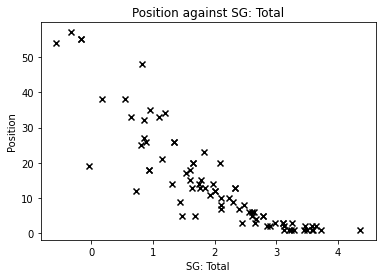

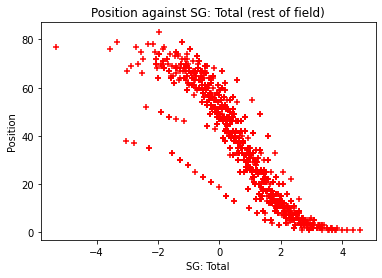

It seems like from our eight player list, the times they have won the tournament,they have 3 strokes gained against the field in total, let's confirm this:

                 player  sg_total
204           Sam Burns      3.12
3511          Sam Burns      3.21
2024  Scottie Scheffler      3.23
1645  Scottie Scheffler      3.29
691            Jon Rahm      3.44
1291          Sam Burns      3.50
286       Justin Thomas      3.58
1352      Cameron Smith      3.59
2591      Cameron Smith      3.72
946   Scottie Scheffler      4.36

 Our players that have won indeed have had more than 3 strokes gained in all aspects of their game 
 for that event!


In [5]:
plt.scatter(x = eight_players[eight_players.position != 0].sg_total, \
            y = eight_players[eight_players.position != 0].position, \
            color = 'black', marker ='x')
plt.ylabel('Position')
plt.xlabel('SG: Total')
plt.title('Position against SG: Total')
plt.show()
plt.clf()

plt.scatter(x = not_eight_players[not_eight_players.position != 0].sg_total, \
            y = not_eight_players[not_eight_players.position != 0].position, \
            color = 'red', marker ='+')
plt.ylabel('Position')
plt.xlabel('SG: Total')
plt.title('Position against SG: Total (rest of field)')
plt.show()

print('It seems like from our eight player list, the times they have won the tournament,\
they have 3 strokes gained against the field in total, let\'s confirm this:\n')
print(eight_players.loc[eight_players.position == 1,['player','sg_total']].sort_values(by='sg_total'))
print('\n Our players that have won indeed have had more than 3 strokes gained in all aspects of their game \n for that event!')

### 3.2 
We plotted our strokes gained distributions for each player in our initial EDA, but we now have a very biased sample of data containing only the best players, are the distributions for these players skewed or will they also be normally distributed?

Mean SG: Putting: 0.27
Median SG: Putting: 0.35
Standard deviation SG: Putting: 0.819


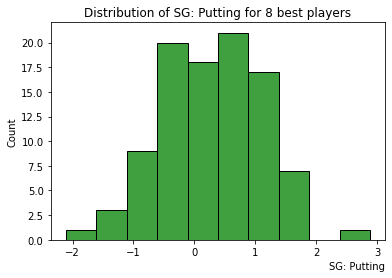

--------------------------------------------------
Mean SG: Around the green: 0.183
Median SG: Around the green: 0.21
Standard deviation SG: Around the green: 0.537


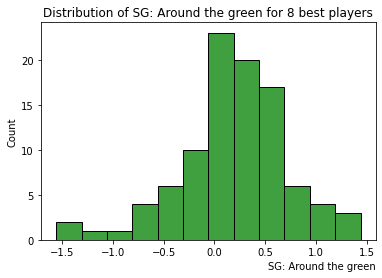

--------------------------------------------------
Mean SG: Approach: 0.614
Median SG: Approach: 0.81
Standard deviation SG: Approach: 1.087


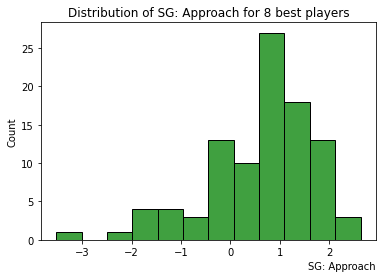

--------------------------------------------------
Mean SG: Off the tee: 0.409
Median SG: Off the tee: 0.54
Standard deviation SG: Off the tee: 0.744


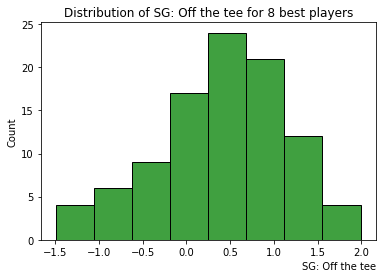

--------------------------------------------------
Mean SG: Tee to green: 1.206
Median SG: Tee to green: 1.34
Standard deviation SG: Tee to green: 1.312


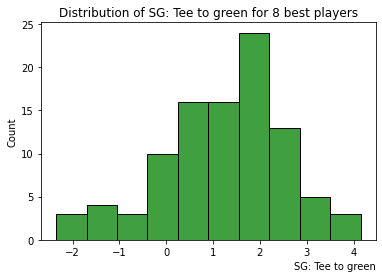

--------------------------------------------------
Mean SG: Total: 1.492
Median SG: Total: 1.68
Standard deviation SG: Total: 1.504


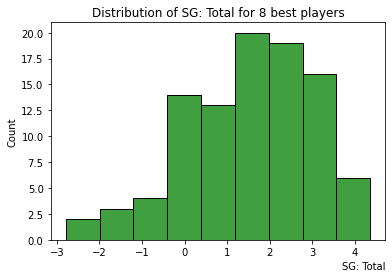

--------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [6]:
numeric_vars = ['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total']
vars_words = ['Putting', 'Around the green', 'Approach', 'Off the tee', 'Tee to green', 'Total']

for var, word in zip(numeric_vars, vars_words):
    print('Mean SG: {}:'.format(word), np.round(eight_players[var].mean(),3))
    print('Median SG: {}:'.format(word), np.round(eight_players[var].median(),3))
    print('Standard deviation SG: {}:'.format(word), np.round(np.std(eight_players[var]),3))
    sns.histplot(eight_players[var], color = 'green')
    plt.xlabel('SG: {}'.format(word), loc = 'right')
    plt.title('Distribution of SG: {} for 8 best players'.format(word))
    plt.show()
    plt.clf()
    print('-'*50)

**The distributions for our eight best players are mostly negatively skewed, as expected. These players don't play bad very often at all!**

### 3.3 
Strokes gained total box plots for our 8 best players compared to the rest of the field:

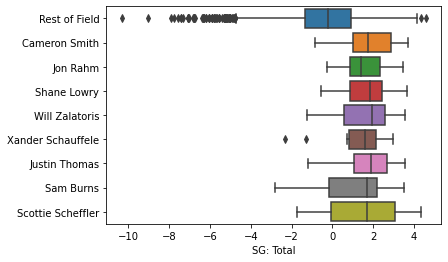

<Figure size 432x288 with 0 Axes>

In [7]:
eight_players_rest = not_eight_players.copy()
eight_players_rest.player = 'Rest of Field'
eight_players_rest = pd.concat([eight_players_rest,eight_players])
sns.boxplot(data=eight_players_rest,x = 'sg_total',y = 'player')
plt.ylabel('')
plt.xlabel('SG: Total')
plt.show()
plt.clf()

**Our eight best players never got below -4 in strokes gained on the field, while the rest of the field has an average SG_Total of around ~-1. One can see the wide range of SG:Total of the rest of the field as well!**

Another interesting thing to explore is whether the purse of a tournament (prize money) affected the way people played. Did players play better or worse when the stakes were higher?

In [8]:
corr, p = stats.pearsonr(not_eight_players.avg_score, not_eight_players.purse)
print('Correlation between average score and prize money for rest of field:\n',corr)

corr_8, p = stats.pearsonr(eight_players.purse, eight_players.avg_score)
print('Correlation between average score and prize money for eight best players:\n',corr_8)

Correlation between average score and prize money for rest of field:
 0.4045203955778144
Correlation between average score and prize money for eight best players:
 0.5608957673492858


Looks like everyone, on average, performs better when the stakes are higher, but the eight best players turn it up a notch... They aren't the best for no reason!

### The final task one can do is develop a linear regression model to make some predictions based on our datasets! 
Let's try to predict someone's position based on their strokes gained: putting. How much does good putting matter when someone is trying to win. As a decent golfer, I know that putting is one of the most important parts of the game to score well... but at the highest level, is it vital?

Checking homoscedasticity assumption:


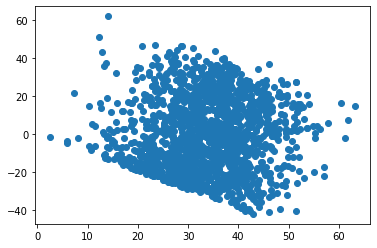

Checking normality assumption:


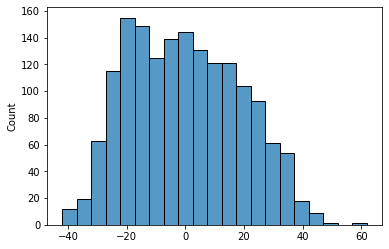

In [9]:
#Only include rows where golfers made the cut
made_cut = df[df.position != 0]

model = sm.OLS.from_formula('position~sg_putt', data = made_cut)
results = model.fit()

fitted_values = results.predict(made_cut)
residuals = made_cut.position - fitted_values

#Checking the homoscedasticity assumption
print('Checking homoscedasticity assumption:')
plt.scatter(fitted_values, residuals)
plt.show()
plt.clf()

#Checking the normality assumption
print('Checking normality assumption:')
sns.histplot(residuals)
plt.show()

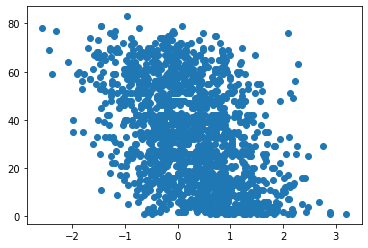

Prediction of position for sg_putt of 0.5: 30.947631604888983
Prediction of position for sg_putt of 1.5: 20.44376253908601
Average position for players between 0.5 and 1.5 strokes gained putting: 25.75769230769231
Prediction of position for sg_putt of 4: -5.815910125421425


In [10]:
plt.scatter(made_cut.sg_putt, made_cut.position)
plt.show()
position_1 = results.predict({'sg_putt': 0.5})
position_2 = results.predict({'sg_putt': 1.5})

print('Prediction of position for sg_putt of 0.5:',position_1[0])
print('Prediction of position for sg_putt of 1.5:',position_2[0])

sgputt_half_onehalf = made_cut.loc[(made_cut.sg_putt >= 0.5) & (made_cut.sg_putt <= 1.5)]
print('Average position for players between 0.5 and 1.5 strokes gained putting:', sgputt_half_onehalf.position.mean())

print('Prediction of position for sg_putt of 4:', results.predict({'sg_putt':4.0})[0])

Looks like our model predicts a negative finish! This is because we don't have any data with such a massive `sg:putt`. Let's see where our model breaks down!

In [11]:
sgputt_range = np.linspace(3.0,4.0,100)
for val in sgputt_range:
    pred = results.predict({'sg_putt':val})
    print(val, pred[0])

3.0 4.687958940381549
3.01010101010101 4.5818592528481865
3.0202020202020203 4.475759565314821
3.0303030303030303 4.369659877781459
3.04040404040404 4.263560190248096
3.0505050505050506 4.157460502714734
3.0606060606060606 4.0513608151813685
3.070707070707071 3.9452611276480027
3.080808080808081 3.839161440114644
3.090909090909091 3.7330617525812784
3.101010101010101 3.6269620650479126
3.111111111111111 3.520862377514554
3.121212121212121 3.4147626899811883
3.1313131313131315 3.3086630024478225
3.1414141414141414 3.202563314914464
3.1515151515151514 3.096463627381098
3.1616161616161618 2.9903639398477324
3.1717171717171717 2.8842642523143738
3.1818181818181817 2.778164564781008
3.191919191919192 2.6720648772476423
3.202020202020202 2.5659651897142837
3.212121212121212 2.459865502180918
3.2222222222222223 2.353765814647552
3.2323232323232323 2.2476661271141936
3.242424242424242 2.141566439580828
3.2525252525252526 2.035466752047462
3.2626262626262625 1.9293670645141034
3.272727272727273

So apparently a strokes gained: putting of 3.35 will get you to win on the PGA tour...